# Wisconsin Breast Cancer Original Dataset

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Importing the dataset

In [2]:
dataset = pd.read_excel("Wisconsin Breast Cancer Original.xlsx")

## Exploratory data analysis

In [3]:
dataset.head()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,simple_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
dataset.tail()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,simple_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [5]:
dataset.shape

(699, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_of_cell_size      699 non-null    int64 
 3   uniformity_of_cell_shape     699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   simple_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
dataset.describe(include = "O")

,bare_nuclei
count,699
unique,11
top,1
freq,402


In [8]:
dataset.bare_nuclei.value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [9]:
dataset = dataset.replace('?', np.NaN)

In [10]:
dataset.isna()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,simple_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


In [11]:
dataset.isna().any()

id                             False
clump_thickness                False
uniformity_of_cell_size        False
uniformity_of_cell_shape       False
marginal_adhesion              False
simple_epithelial_cell_size    False
bare_nuclei                     True
bland_chromatin                False
normal_nucleoli                False
mitoses                        False
class                          False
dtype: bool

In [12]:
dataset.isna().sum()

id                              0
clump_thickness                 0
uniformity_of_cell_size         0
uniformity_of_cell_shape        0
marginal_adhesion               0
simple_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

In [13]:
dataset = dataset.dropna()

In [14]:
dataset.isna().any()

id                             False
clump_thickness                False
uniformity_of_cell_size        False
uniformity_of_cell_shape       False
marginal_adhesion              False
simple_epithelial_cell_size    False
bare_nuclei                    False
bland_chromatin                False
normal_nucleoli                False
mitoses                        False
class                          False
dtype: bool

In [15]:
dataset.shape

(683, 11)

In [16]:
dataset['bare_nuclei'] = dataset['bare_nuclei'].astype(np.int64)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           683 non-null    int64
 1   clump_thickness              683 non-null    int64
 2   uniformity_of_cell_size      683 non-null    int64
 3   uniformity_of_cell_shape     683 non-null    int64
 4   marginal_adhesion            683 non-null    int64
 5   simple_epithelial_cell_size  683 non-null    int64
 6   bare_nuclei                  683 non-null    int64
 7   bland_chromatin              683 non-null    int64
 8   normal_nucleoli              683 non-null    int64
 9   mitoses                      683 non-null    int64
 10  class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


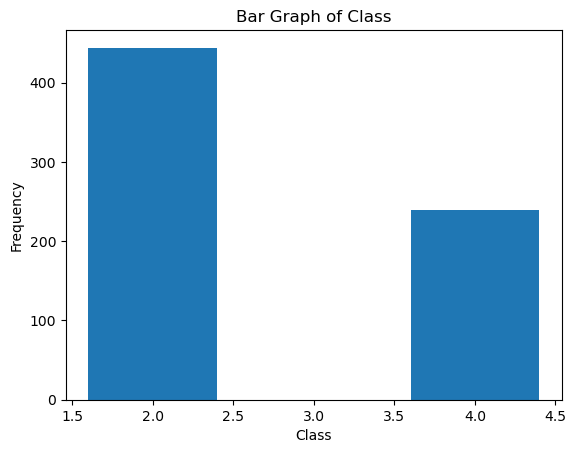

In [18]:
x_column = "class"
value_counts = dataset[x_column].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Bar Graph of Class")
plt.show()

Text(0.5, 1.0, 'Correlation matrix')

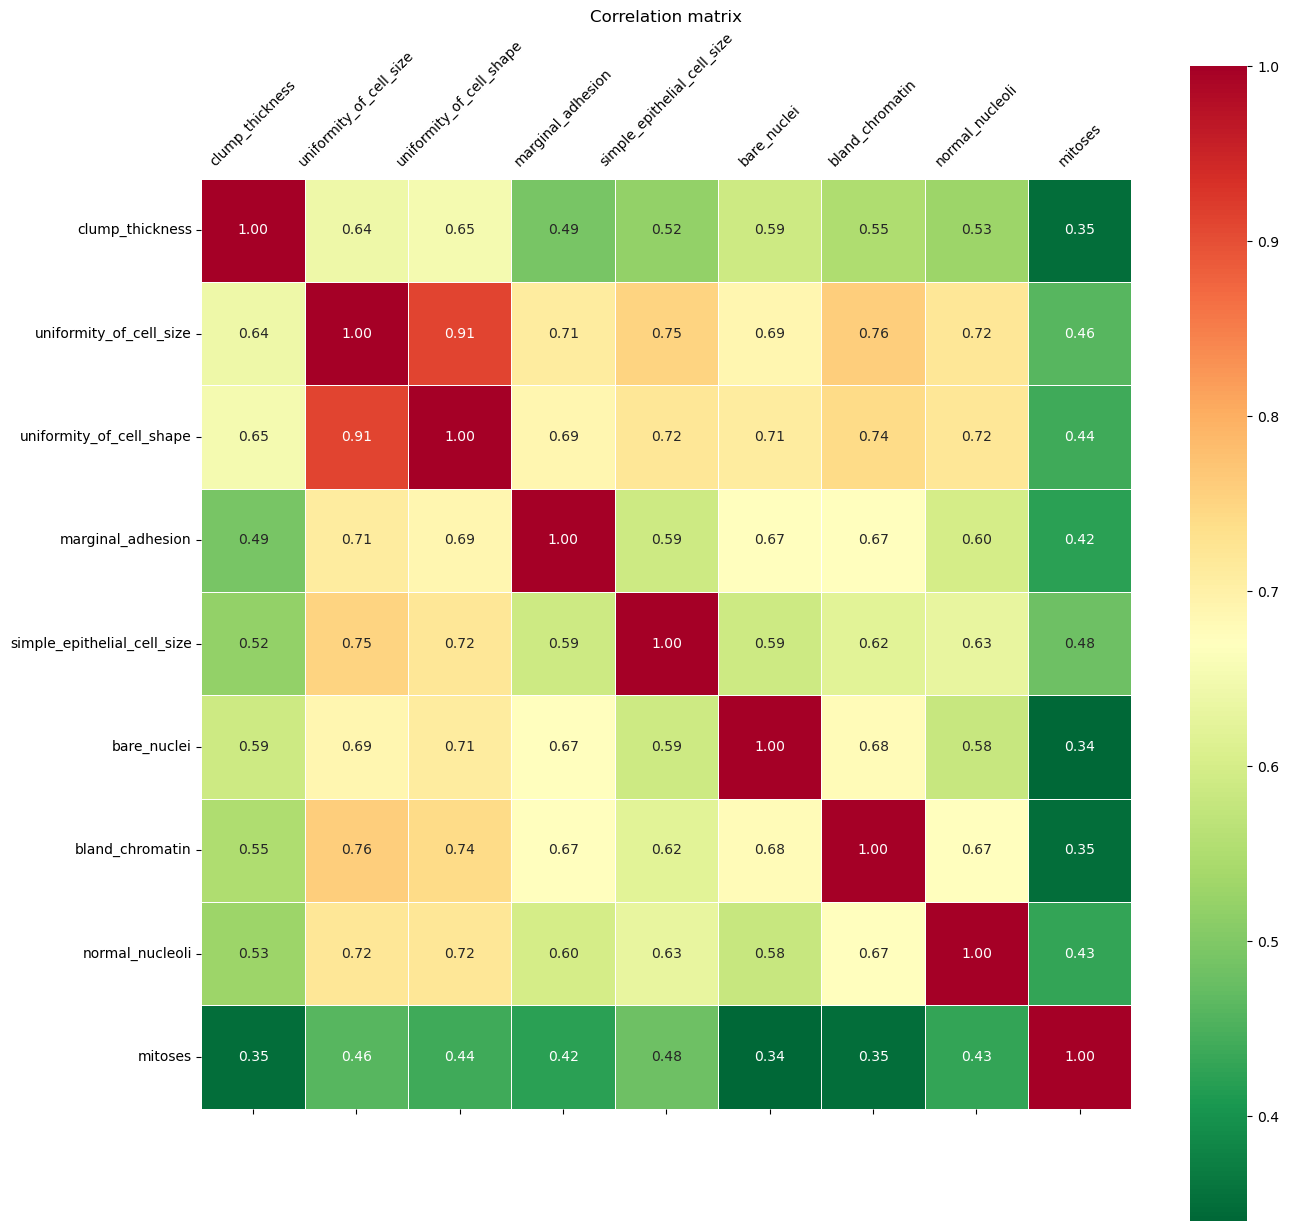

In [19]:
cols = dataset.columns[1:-1]
correlation = dataset[cols].corr('pearson')
plt.figure(figsize=(15,15), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.heatmap(correlation.round(2), cmap='RdYlGn_r', linewidths=0.5, annot=True,
                 cbar=True, square=True, fmt='0.2f')
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False, labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Correlation matrix')

## Data preprocessing

In [20]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [21]:
print(X)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


In [22]:
print(y)

[2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2
 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4 4
 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4
 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 4
 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 4 2 4 4 4 2 2 2 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 4 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2
 4 2 2 2 4 2 2 4 4 2 2 4 2 4 2 2 4 2 4 4 4 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2
 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2
 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 4
 2 2 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2
 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 2 2 2 4 4 4 2 4 2 4 2 2
 2 2 2 2 2 2 2 2 2 2 4 2 

### Encoding the dependent variable

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
print(y)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

### Splitting the dataset into the training set and test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the SVM model on the training set

In [28]:
from sklearn.svm import SVC
svc_model_1 = SVC(kernel = "linear", C = 0.05)
svc_model_2 = SVC(kernel = "poly", degree = 2)
svc_model_3 = SVC(kernel = "poly", degree = 3)
svc_model_4 = SVC(kernel = "poly", degree = 4)
svc_model_5 = SVC(kernel = "poly", degree = 5)
svc_model_6 = SVC(kernel = "rbf", gamma = "scale")
svc_model_7 = SVC(kernel = "rbf", gamma = "auto")
svc_model_8 = SVC(kernel = "sigmoid", gamma = "scale")
svc_model_9 = SVC(kernel = "sigmoid", gamma = "auto")

svc_model_1.fit(X_train, y_train)
svc_model_2.fit(X_train, y_train)
svc_model_3.fit(X_train, y_train)
svc_model_4.fit(X_train, y_train)
svc_model_5.fit(X_train, y_train)
svc_model_6.fit(X_train, y_train)
svc_model_7.fit(X_train, y_train)
svc_model_8.fit(X_train, y_train)
svc_model_9.fit(X_train, y_train)

SVC(gamma='auto', kernel='sigmoid')

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

models = [("svc_model_1", svc_model_1), ("svc_model_2", svc_model_2), ("svc_model_3", svc_model_3),
          ("svc_model_4", svc_model_4), ("svc_model_5", svc_model_5), ("svc_model_6", svc_model_6),
          ("svc_model_7", svc_model_7), ("svc_model_8", svc_model_8), ("svc_model_9", svc_model_9)]

for name, model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Confusion matrix for", name, ":\n", cm)
    print("Accuracy for", name, ":", accuracy)
    print("Precision for", name, ":", precision)
    print("Recall for", name, ":", recall)
    print("F1 score for", name, ":", f1)
    print("--------------------------------------------------")

Confusion matrix for svc_model_1 :
 [[78  1]
 [ 3 55]]
Accuracy for svc_model_1 : 0.9708029197080292
Precision for svc_model_1 : 0.9821428571428571
Recall for svc_model_1 : 0.9482758620689655
F1 score for svc_model_1 : 0.9649122807017544
--------------------------------------------------
Confusion matrix for svc_model_2 :
 [[77  2]
 [12 46]]
Accuracy for svc_model_2 : 0.8978102189781022
Precision for svc_model_2 : 0.9583333333333334
Recall for svc_model_2 : 0.7931034482758621
F1 score for svc_model_2 : 0.8679245283018867
--------------------------------------------------
Confusion matrix for svc_model_3 :
 [[79  0]
 [11 47]]
Accuracy for svc_model_3 : 0.9197080291970803
Precision for svc_model_3 : 1.0
Recall for svc_model_3 : 0.8103448275862069
F1 score for svc_model_3 : 0.8952380952380952
--------------------------------------------------
Confusion matrix for svc_model_4 :
 [[79  0]
 [18 40]]
Accuracy for svc_model_4 : 0.8686131386861314
Precision for svc_model_4 : 1.0
Recall for svc_

## Training the ANN model on the training set

In [30]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))
ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
18/18 [==============================] - 2s 1ms/step - loss: 0.8007 - accuracy: 0.5678
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.7149 - accuracy: 0.7784
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6549 - accuracy: 0.8462
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6143 - accuracy: 0.8810
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5796 - accuracy: 0.8901
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5430 - accuracy: 0.9029
Epoch 7/100
18/18 [==============================] - 0s 699us/step - loss: 0.5005 - accuracy: 0.9103
Epoch 8/100
18/18 [==============================] - 0s 741us/step - loss: 0.4503 - accuracy: 0.9249
Epoch 9/100
18/18 [==============================] - 0s 683us/step - loss: 0.3984 - accuracy: 0.9396
Epoch 10/100
18/18 [==============================] - 0s 769us/step - loss: 0.3506 - accuracy: 0.9432
E

18/18 [==============================] - 0s 760us/step - loss: 0.0741 - accuracy: 0.9744
Epoch 82/100
18/18 [==============================] - 0s 816us/step - loss: 0.0738 - accuracy: 0.9744
Epoch 83/100
18/18 [==============================] - 0s 731us/step - loss: 0.0736 - accuracy: 0.9744
Epoch 84/100
18/18 [==============================] - 0s 772us/step - loss: 0.0733 - accuracy: 0.9744
Epoch 85/100
18/18 [==============================] - 0s 815us/step - loss: 0.0730 - accuracy: 0.9744
Epoch 86/100
18/18 [==============================] - 0s 702us/step - loss: 0.0729 - accuracy: 0.9744
Epoch 87/100
18/18 [==============================] - 0s 723us/step - loss: 0.0726 - accuracy: 0.9744
Epoch 88/100
18/18 [==============================] - 0s 746us/step - loss: 0.0724 - accuracy: 0.9744
Epoch 89/100
18/18 [==============================] - 0s 945us/step - loss: 0.0722 - accuracy: 0.9744
Epoch 90/100
18/18 [==============================] - 0s 799us/step - loss: 0.0722 - accuracy: 

In [31]:
# Make predictions on the test set
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("--------------------------------------------------")

5/5 [==============================] - 0s 1ms/step
Confusion Matrix:
 [[78  1]
 [ 4 54]]
Accuracy: 0.9635036496350365
Precision: 0.9818181818181818
Recall: 0.9310344827586207
F1-score: 0.9557522123893805
--------------------------------------------------


In [32]:
# Define the models and their names
models = [("svc_model_1", svc_model_1), ("svc_model_2", svc_model_2), ("svc_model_3", svc_model_3),
          ("svc_model_4", svc_model_4), ("svc_model_5", svc_model_5), ("svc_model_6", svc_model_6),
          ("svc_model_7", svc_model_7), ("svc_model_8", svc_model_8), ("svc_model_9", svc_model_9)]

# Create an empty list to store the metrics
metrics_list = []

# Loop through the models and calculate the metrics
for name, model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the metrics to the list
    metrics_list.append([name, accuracy, precision, recall, f1])

# Create a pandas dataframe from the metrics list
metrics_df = pd.DataFrame(metrics_list, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Print the dataframe
print(metrics_df)

         Model  Accuracy  Precision    Recall  F1-score
0  svc_model_1  0.970803   0.982143  0.948276  0.964912
1  svc_model_2  0.897810   0.958333  0.793103  0.867925
2  svc_model_3  0.919708   1.000000  0.810345  0.895238
3  svc_model_4  0.868613   1.000000  0.689655  0.816327
4  svc_model_5  0.883212   1.000000  0.724138  0.840000
5  svc_model_6  0.963504   0.964912  0.948276  0.956522
6  svc_model_7  0.963504   0.964912  0.948276  0.956522
7  svc_model_8  0.956204   0.964286  0.931034  0.947368
8  svc_model_9  0.956204   0.964286  0.931034  0.947368


In [33]:
# Calculate the metrics for the neural network model
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dataframe for the neural network model
nn_df = pd.DataFrame([["ann_model", accuracy, precision, recall, f1]], 
                     columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Concatenate the dataframes
metrics_df = pd.concat([metrics_df, nn_df], ignore_index=True)

# Print the concatenated dataframe
print(metrics_df)

5/5 [==============================] - 0s 752us/step
         Model  Accuracy  Precision    Recall  F1-score
0  svc_model_1  0.970803   0.982143  0.948276  0.964912
1  svc_model_2  0.897810   0.958333  0.793103  0.867925
2  svc_model_3  0.919708   1.000000  0.810345  0.895238
3  svc_model_4  0.868613   1.000000  0.689655  0.816327
4  svc_model_5  0.883212   1.000000  0.724138  0.840000
5  svc_model_6  0.963504   0.964912  0.948276  0.956522
6  svc_model_7  0.963504   0.964912  0.948276  0.956522
7  svc_model_8  0.956204   0.964286  0.931034  0.947368
8  svc_model_9  0.956204   0.964286  0.931034  0.947368
9    ann_model  0.963504   0.981818  0.931034  0.955752


## Applying PCA

In [34]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pca = PCA()
param_grid = {'n_components': [1, 2, 3, 4, 5]}
grid_search = GridSearchCV(pca, param_grid, cv=10)
grid_search.fit(X_train)
print(grid_search.best_params_)

{'n_components': 5}


In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

In [36]:
from sklearn.svm import SVC
svc_pca_1 = SVC(kernel = "linear", C = 0.05)
svc_pca_2 = SVC(kernel = "poly", degree = 2)
svc_pca_3 = SVC(kernel = "poly", degree = 3)
svc_pca_4 = SVC(kernel = "poly", degree = 4)
svc_pca_5 = SVC(kernel = "poly", degree = 5)
svc_pca_6 = SVC(kernel = "rbf", gamma = "scale")
svc_pca_7 = SVC(kernel = "rbf", gamma = "auto")
svc_pca_8 = SVC(kernel = "sigmoid", gamma = "scale")
svc_pca_9 = SVC(kernel = "sigmoid", gamma = "auto")

svc_pca_1.fit(pca_X_train, y_train)
svc_pca_2.fit(pca_X_train, y_train)
svc_pca_3.fit(pca_X_train, y_train)
svc_pca_4.fit(pca_X_train, y_train)
svc_pca_5.fit(pca_X_train, y_train)
svc_pca_6.fit(pca_X_train, y_train)
svc_pca_7.fit(pca_X_train, y_train)
svc_pca_8.fit(pca_X_train, y_train)
svc_pca_9.fit(pca_X_train, y_train)

SVC(gamma='auto', kernel='sigmoid')

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

models = [("svc_pca_1", svc_pca_1), ("svc_pca_2", svc_pca_2), ("svc_pca_3", svc_pca_3),
          ("svc_pca_4", svc_pca_4), ("svc_pca_5", svc_pca_5), ("svc_pca_6", svc_pca_6),
          ("svc_pca_7", svc_pca_7), ("svc_pca_8", svc_pca_8), ("svc_pca_9", svc_pca_9)]

for name, model in models:
    y_pred = model.predict(pca_X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Confusion matrix for", name, ":\n", cm)
    print("Accuracy for", name, ":", accuracy)
    print("Precision for", name, ":", precision)
    print("Recall for", name, ":", recall)
    print("F1 score for", name, ":", f1)
    print("--------------------------------------------------")

Confusion matrix for svc_pca_1 :
 [[78  1]
 [ 3 55]]
Accuracy for svc_pca_1 : 0.9708029197080292
Precision for svc_pca_1 : 0.9821428571428571
Recall for svc_pca_1 : 0.9482758620689655
F1 score for svc_pca_1 : 0.9649122807017544
--------------------------------------------------
Confusion matrix for svc_pca_2 :
 [[78  1]
 [13 45]]
Accuracy for svc_pca_2 : 0.8978102189781022
Precision for svc_pca_2 : 0.9782608695652174
Recall for svc_pca_2 : 0.7758620689655172
F1 score for svc_pca_2 : 0.8653846153846154
--------------------------------------------------
Confusion matrix for svc_pca_3 :
 [[79  0]
 [13 45]]
Accuracy for svc_pca_3 : 0.9051094890510949
Precision for svc_pca_3 : 1.0
Recall for svc_pca_3 : 0.7758620689655172
F1 score for svc_pca_3 : 0.8737864077669902
--------------------------------------------------
Confusion matrix for svc_pca_4 :
 [[79  0]
 [18 40]]
Accuracy for svc_pca_4 : 0.8686131386861314
Precision for svc_pca_4 : 1.0
Recall for svc_pca_4 : 0.6896551724137931
F1 score 

In [38]:
ann_pca = tf.keras.models.Sequential()
ann_pca.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann_pca.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann_pca.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))
ann_pca.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
ann_pca.fit(pca_X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
18/18 [==============================] - 0s 767us/step - loss: 0.7222 - accuracy: 0.4963
Epoch 2/100
18/18 [==============================] - 0s 715us/step - loss: 0.6683 - accuracy: 0.7253
Epoch 3/100
18/18 [==============================] - 0s 744us/step - loss: 0.6225 - accuracy: 0.7766
Epoch 4/100
18/18 [==============================] - 0s 865us/step - loss: 0.5804 - accuracy: 0.7949
Epoch 5/100
18/18 [==============================] - 0s 726us/step - loss: 0.5406 - accuracy: 0.8077
Epoch 6/100
18/18 [==============================] - 0s 719us/step - loss: 0.5024 - accuracy: 0.8352
Epoch 7/100
18/18 [==============================] - 0s 675us/step - loss: 0.4654 - accuracy: 0.8626
Epoch 8/100
18/18 [==============================] - 0s 718us/step - loss: 0.4287 - accuracy: 0.8755
Epoch 9/100
18/18 [==============================] - 0s 752us/step - loss: 0.3922 - accuracy: 0.9048
Epoch 10/100
18/18 [==============================] - 0s 767us/step - loss: 0.3566 - accura

18/18 [==============================] - 0s 711us/step - loss: 0.0674 - accuracy: 0.9744
Epoch 82/100
18/18 [==============================] - 0s 798us/step - loss: 0.0670 - accuracy: 0.9744
Epoch 83/100
18/18 [==============================] - 0s 716us/step - loss: 0.0667 - accuracy: 0.9744
Epoch 84/100
18/18 [==============================] - 0s 722us/step - loss: 0.0665 - accuracy: 0.9744
Epoch 85/100
18/18 [==============================] - 0s 732us/step - loss: 0.0664 - accuracy: 0.9744
Epoch 86/100
18/18 [==============================] - 0s 712us/step - loss: 0.0663 - accuracy: 0.9762
Epoch 87/100
18/18 [==============================] - 0s 895us/step - loss: 0.0663 - accuracy: 0.9762
Epoch 88/100
18/18 [==============================] - 0s 727us/step - loss: 0.0661 - accuracy: 0.9762
Epoch 89/100
18/18 [==============================] - 0s 738us/step - loss: 0.0659 - accuracy: 0.9762
Epoch 90/100
18/18 [==============================] - 0s 710us/step - loss: 0.0658 - accuracy: 

In [39]:
# Make predictions on the test set
y_pred = ann_pca.predict(pca_X_test)
y_pred = (y_pred > 0.5)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("--------------------------------------------------")

5/5 [==============================] - 0s 1ms/step
Confusion Matrix:
 [[78  1]
 [ 3 55]]
Accuracy: 0.9708029197080292
Precision: 0.9821428571428571
Recall: 0.9482758620689655
F1-score: 0.9649122807017544
--------------------------------------------------


In [40]:
# Define the models and their names
models = [("svc_pca_1", svc_pca_1), ("svc_pca_2", svc_pca_2), ("svc_pca_3", svc_pca_3),
          ("svc_pca_4", svc_pca_4), ("svc_pca_5", svc_pca_5), ("svc_pca_6", svc_pca_6),
          ("svc_pca_7", svc_pca_7), ("svc_pca_8", svc_pca_8), ("svc_pca_9", svc_pca_9)]

# Create an empty list to store the metrics
metrics_list = []

# Loop through the models and calculate the metrics
for name, model in models:
    y_pred = model.predict(pca_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the metrics to the list
    metrics_list.append([name, accuracy, precision, recall, f1])

# Create a pandas dataframe from the metrics list
metrics_df = pd.DataFrame(metrics_list, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Print the dataframe
print(metrics_df)

       Model  Accuracy  Precision    Recall  F1-score
0  svc_pca_1  0.970803   0.982143  0.948276  0.964912
1  svc_pca_2  0.897810   0.978261  0.775862  0.865385
2  svc_pca_3  0.905109   1.000000  0.775862  0.873786
3  svc_pca_4  0.868613   1.000000  0.689655  0.816327
4  svc_pca_5  0.875912   1.000000  0.706897  0.828283
5  svc_pca_6  0.970803   0.982143  0.948276  0.964912
6  svc_pca_7  0.970803   0.982143  0.948276  0.964912
7  svc_pca_8  0.948905   0.963636  0.913793  0.938053
8  svc_pca_9  0.956204   0.964286  0.931034  0.947368


In [41]:
# Calculate the metrics for the neural network model
y_pred = ann_pca.predict(pca_X_test)
y_pred = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dataframe for the neural network model
nn_df = pd.DataFrame([["ann_pca", accuracy, precision, recall, f1]], 
                     columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Concatenate the dataframes
metrics_df = pd.concat([metrics_df, nn_df], ignore_index=True)

# Print the concatenated dataframe
print(metrics_df)

5/5 [==============================] - 0s 1ms/step
       Model  Accuracy  Precision    Recall  F1-score
0  svc_pca_1  0.970803   0.982143  0.948276  0.964912
1  svc_pca_2  0.897810   0.978261  0.775862  0.865385
2  svc_pca_3  0.905109   1.000000  0.775862  0.873786
3  svc_pca_4  0.868613   1.000000  0.689655  0.816327
4  svc_pca_5  0.875912   1.000000  0.706897  0.828283
5  svc_pca_6  0.970803   0.982143  0.948276  0.964912
6  svc_pca_7  0.970803   0.982143  0.948276  0.964912
7  svc_pca_8  0.948905   0.963636  0.913793  0.938053
8  svc_pca_9  0.956204   0.964286  0.931034  0.947368
9    ann_pca  0.970803   0.982143  0.948276  0.964912


## Applying LDA

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
lda_X_train = lda.fit_transform(X_train, y_train)
lda_X_test = lda.transform(X_test)

In [43]:
from sklearn.svm import SVC
svc_lda_1 = SVC(kernel = "linear", C = 0.05)
svc_lda_2 = SVC(kernel = "poly", degree = 2)
svc_lda_3 = SVC(kernel = "poly", degree = 3)
svc_lda_4 = SVC(kernel = "poly", degree = 4)
svc_lda_5 = SVC(kernel = "poly", degree = 5)
svc_lda_6 = SVC(kernel = "rbf", gamma = "scale")
svc_lda_7 = SVC(kernel = "rbf", gamma = "auto")
svc_lda_8 = SVC(kernel = "sigmoid", gamma = "scale")
svc_lda_9 = SVC(kernel = "sigmoid", gamma = "auto")

svc_lda_1.fit(lda_X_train, y_train)
svc_lda_2.fit(lda_X_train, y_train)
svc_lda_3.fit(lda_X_train, y_train)
svc_lda_4.fit(lda_X_train, y_train)
svc_lda_5.fit(lda_X_train, y_train)
svc_lda_6.fit(lda_X_train, y_train)
svc_lda_7.fit(lda_X_train, y_train)
svc_lda_8.fit(lda_X_train, y_train)
svc_lda_9.fit(lda_X_train, y_train)

SVC(gamma='auto', kernel='sigmoid')

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

models = [("svc_lda_1", svc_lda_1), ("svc_lda_2", svc_lda_2), ("svc_lda_3", svc_lda_3),
          ("svc_lda_4", svc_lda_4), ("svc_lda_5", svc_lda_5), ("svc_lda_6", svc_lda_6),
          ("svc_lda_7", svc_lda_7), ("svc_lda_8", svc_lda_8), ("svc_lda_9", svc_lda_9)]

for name, model in models:
    y_pred = model.predict(lda_X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Confusion matrix for", name, ":\n", cm)
    print("Accuracy for", name, ":", accuracy)
    print("Precision for", name, ":", precision)
    print("Recall for", name, ":", recall)
    print("F1 score for", name, ":", f1)
    print("--------------------------------------------------")

Confusion matrix for svc_lda_1 :
 [[78  1]
 [ 8 50]]
Accuracy for svc_lda_1 : 0.9343065693430657
Precision for svc_lda_1 : 0.9803921568627451
Recall for svc_lda_1 : 0.8620689655172413
F1 score for svc_lda_1 : 0.9174311926605505
--------------------------------------------------
Confusion matrix for svc_lda_2 :
 [[79  0]
 [25 33]]
Accuracy for svc_lda_2 : 0.8175182481751825
Precision for svc_lda_2 : 1.0
Recall for svc_lda_2 : 0.5689655172413793
F1 score for svc_lda_2 : 0.7252747252747253
--------------------------------------------------
Confusion matrix for svc_lda_3 :
 [[79  0]
 [13 45]]
Accuracy for svc_lda_3 : 0.9051094890510949
Precision for svc_lda_3 : 1.0
Recall for svc_lda_3 : 0.7758620689655172
F1 score for svc_lda_3 : 0.8737864077669902
--------------------------------------------------
Confusion matrix for svc_lda_4 :
 [[79  0]
 [22 36]]
Accuracy for svc_lda_4 : 0.8394160583941606
Precision for svc_lda_4 : 1.0
Recall for svc_lda_4 : 0.6206896551724138
F1 score for svc_lda_4 :

In [45]:
ann_lda = tf.keras.models.Sequential()
ann_lda.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann_lda.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann_lda.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))
ann_lda.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
ann_lda.fit(lda_X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
18/18 [==============================] - 0s 728us/step - loss: 0.9294 - accuracy: 0.0275
Epoch 2/100
18/18 [==============================] - 0s 733us/step - loss: 0.8570 - accuracy: 0.0311
Epoch 3/100
18/18 [==============================] - 0s 708us/step - loss: 0.7985 - accuracy: 0.0348
Epoch 4/100
18/18 [==============================] - 0s 708us/step - loss: 0.7539 - accuracy: 0.0440
Epoch 5/100
18/18 [==============================] - 0s 708us/step - loss: 0.7255 - accuracy: 0.0861
Epoch 6/100
18/18 [==============================] - 0s 767us/step - loss: 0.7078 - accuracy: 0.2161
Epoch 7/100
18/18 [==============================] - 0s 826us/step - loss: 0.6942 - accuracy: 0.5275
Epoch 8/100
18/18 [==============================] - 0s 746us/step - loss: 0.6806 - accuracy: 0.6850
Epoch 9/100
18/18 [==============================] - 0s 767us/step - loss: 0.6666 - accuracy: 0.7216
Epoch 10/100
18/18 [==============================] - 0s 791us/step - loss: 0.6510 - accura

18/18 [==============================] - 0s 708us/step - loss: 0.0761 - accuracy: 0.9744
Epoch 82/100
18/18 [==============================] - 0s 861us/step - loss: 0.0760 - accuracy: 0.9744
Epoch 83/100
18/18 [==============================] - 0s 708us/step - loss: 0.0759 - accuracy: 0.9744
Epoch 84/100
18/18 [==============================] - 0s 855us/step - loss: 0.0761 - accuracy: 0.9744
Epoch 85/100
18/18 [==============================] - 0s 767us/step - loss: 0.0759 - accuracy: 0.9744
Epoch 86/100
18/18 [==============================] - 0s 773us/step - loss: 0.0758 - accuracy: 0.9744
Epoch 87/100
18/18 [==============================] - 0s 826us/step - loss: 0.0756 - accuracy: 0.9744
Epoch 88/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9744
Epoch 89/100
18/18 [==============================] - 0s 914us/step - loss: 0.0755 - accuracy: 0.9744
Epoch 90/100
18/18 [==============================] - 0s 885us/step - loss: 0.0753 - accuracy: 0.

In [46]:
# Make predictions on the test set
y_pred = ann_lda.predict(lda_X_test)
y_pred = (y_pred > 0.5)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("--------------------------------------------------")

5/5 [==============================] - 0s 941us/step
Confusion Matrix:
 [[77  2]
 [ 3 55]]
Accuracy: 0.9635036496350365
Precision: 0.9649122807017544
Recall: 0.9482758620689655
F1-score: 0.9565217391304347
--------------------------------------------------


In [47]:
# Define the models and their names
models = [("svc_lda_1", svc_lda_1), ("svc_lda_2", svc_lda_2), ("svc_lda_3", svc_lda_3),
          ("svc_lda_4", svc_lda_4), ("svc_lda_5", svc_lda_5), ("svc_lda_6", svc_lda_6),
          ("svc_lda_7", svc_lda_7), ("svc_lda_8", svc_lda_8), ("svc_lda_9", svc_lda_9)]

# Create an empty list to store the metrics
metrics_list = []

# Loop through the models and calculate the metrics
for name, model in models:
    y_pred = model.predict(lda_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the metrics to the list
    metrics_list.append([name, accuracy, precision, recall, f1])

# Create a pandas dataframe from the metrics list
metrics_df = pd.DataFrame(metrics_list, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Print the dataframe
print(metrics_df)

       Model  Accuracy  Precision    Recall  F1-score
0  svc_lda_1  0.934307   0.980392  0.862069  0.917431
1  svc_lda_2  0.817518   1.000000  0.568966  0.725275
2  svc_lda_3  0.905109   1.000000  0.775862  0.873786
3  svc_lda_4  0.839416   1.000000  0.620690  0.765957
4  svc_lda_5  0.883212   1.000000  0.724138  0.840000
5  svc_lda_6  0.970803   0.965517  0.965517  0.965517
6  svc_lda_7  0.963504   0.964912  0.948276  0.956522
7  svc_lda_8  0.934307   0.980392  0.862069  0.917431
8  svc_lda_9  0.978102   0.966102  0.982759  0.974359


In [48]:
# Calculate the metrics for the neural network model
y_pred = ann_lda.predict(lda_X_test)
y_pred = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dataframe for the neural network model
nn_df = pd.DataFrame([["ann_lda", accuracy, precision, recall, f1]], 
                     columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Concatenate the dataframes
metrics_df = pd.concat([metrics_df, nn_df], ignore_index=True)

# Print the concatenated dataframe
print(metrics_df)

5/5 [==============================] - 0s 1ms/step
       Model  Accuracy  Precision    Recall  F1-score
0  svc_lda_1  0.934307   0.980392  0.862069  0.917431
1  svc_lda_2  0.817518   1.000000  0.568966  0.725275
2  svc_lda_3  0.905109   1.000000  0.775862  0.873786
3  svc_lda_4  0.839416   1.000000  0.620690  0.765957
4  svc_lda_5  0.883212   1.000000  0.724138  0.840000
5  svc_lda_6  0.970803   0.965517  0.965517  0.965517
6  svc_lda_7  0.963504   0.964912  0.948276  0.956522
7  svc_lda_8  0.934307   0.980392  0.862069  0.917431
8  svc_lda_9  0.978102   0.966102  0.982759  0.974359
9    ann_lda  0.963504   0.964912  0.948276  0.956522
